# The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class. Classify each image into one of the 10 classes.

# A. Using a Convolutional Neural Network (CNN) classifier
# B. Using an AlexNet classifier
# C. Using a pre-trained ResNet model
# D. Using a pre-trained Inception model
# E. Provided a specific neural network architecture, train the CIFAR-10 dataset to classify

In [ ]:
!pip install tensorflow

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# CNN Classifier

In [7]:
def build_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

cnn_model = build_cnn_model()
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(x_train, y_train_cat, epochs=5, batch_size=64, validation_data=(x_test, y_test_cat))


C:\Users\LOQ\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.3500 - loss: 1.7915 - val_accuracy: 0.5506 - val_loss: 1.2711
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.5617 - loss: 1.2447 - val_accuracy: 0.5810 - val_loss: 1.1757
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.6171 - loss: 1.0870 - val_accuracy: 0.6452 - val_loss: 1.0266
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.6578 - loss: 0.9760 - val_accuracy: 0.6517 - val_loss: 1.0071
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6823 - loss: 0.9075 - val_accuracy: 0.6592 - val_loss: 0.9812


# AlexNet Classifier

In [9]:
def build_alexnet_model():
    model = models.Sequential([
        layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(32, 32, 3), padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(256, (5, 5), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(384, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(384, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

alexnet_model = build_alexnet_model()
alexnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
alexnet_model.fit(x_train, y_train_cat, epochs=5, batch_size=64, validation_data=(x_test, y_test_cat))


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 179s 222ms/step - accuracy: 0.2836 - loss: 1.9035 - val_accuracy: 0.3994 - val_loss: 1.6991
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 172s 220ms/step - accuracy: 0.4828 - loss: 1.4506 - val_accuracy: 0.5145 - val_loss: 1.3474
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 173s 222ms/step - accuracy: 0.5477 - loss: 1.2850 - val_accuracy: 0.5181 - val_loss: 1.4392
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 172s 220ms/step - accuracy: 0.5939 - loss: 1.1704 - val_accuracy: 0.5633 - val_loss: 1.2654
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 173s 221ms/step - accuracy: 0.6319 - loss: 1.0683 - val_accuracy: 0.5745 - val_loss: 1.2705


# Pre-trained ResNet Model

In [11]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras import layers, models
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# Preprocess function for ResNet
def preprocess_resnet(image, label):
    image = tf.image.resize(image, (224, 224))
    image = preprocess_input(image)
    return image, label

# Create tf.data pipelines for batch-wise loading and resizing
BATCH_SIZE = 32

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train_cat))
train_ds = train_ds.map(preprocess_resnet, num_parallel_calls=tf.data.AUTOTUNE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test_cat))
test_ds = test_ds.map(preprocess_resnet, num_parallel_calls=tf.data.AUTOTUNE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# Load pretrained ResNet
base_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_resnet.trainable = False

# Define model
resnet_model = models.Sequential([
    base_resnet,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile and train
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnet_model.fit(train_ds, epochs=5, validation_data=test_ds)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1386s 881ms/step - accuracy: 0.1365 - loss: 2.2856 - val_accuracy: 0.2166 - val_loss: 2.0632
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1413s 904ms/step - accuracy: 0.2361 - loss: 2.0195 - val_accuracy: 0.2555 - val_loss: 1.9603
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1367s 875ms/step - accuracy: 0.2614 - loss: 1.9530 - val_accuracy: 0.2756 - val_loss: 1.9153
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1354s 867ms/step - accuracy: 0.2799 - loss: 1.9146 - val_accuracy: 0.2895 - val_loss: 1.8949
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1345s 860ms/step - accuracy: 0.2972 - loss: 1.8825 - val_accuracy: 0.2984 - val_loss: 1.8690


# Pre-trained Inception Model

In [13]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input as inception_preprocess
from tensorflow.keras import layers, models
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# Resize + preprocess per sample (safe)
def preprocess_inception(image, label):
    image = tf.image.resize(image, (299, 299))
    image = inception_preprocess(image)
    return image, label

# Create tf.data pipeline (memory-safe)
BATCH_SIZE = 16  # Use small batch size for 299x299 inputs

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train_cat))
train_ds = train_ds.map(preprocess_inception).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test_cat))
test_ds = test_ds.map(preprocess_inception).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# Load pre-trained InceptionV3
base_inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
base_inception.trainable = False

# Build the model
inception_model = models.Sequential([
    base_inception,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile and train
inception_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
inception_model.fit(train_ds, epochs=5, validation_data=test_ds)


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 23s 0us/step
Epoch 1/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 1468s 468ms/step - accuracy: 0.1366 - loss: 2.2604 - val_accuracy: 0.1970 - val_loss: 2.1179
Epoch 2/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 1446s 463ms/step - accuracy: 0.2254 - loss: 2.0293 - val_accuracy: 0.2573 - val_loss: 1.9331
Epoch 3/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 1425s 456ms/step - accuracy: 0.2538 - loss: 1.9013 - val_accuracy: 0.2692 - val_loss: 1.8706
Epoch 4/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 1443s 462ms/step - accuracy: 0.2667 - loss: 1.8582 - val_accuracy: 0.2745 - val_loss: 1.8444
Epoch 5/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 1464s 469ms/step - accuracy: 0.2733 - loss: 1.8357 - val_accuracy: 0.2769 - val_loss: 1.8266


# Custom Model Architecture

In [17]:
def build_custom_model():
    model = models.Sequential([
        layers.Conv2D(16, (3,3), activation='relu', input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(32, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

custom_model = build_custom_model()
custom_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
custom_model.fit(x_train, y_train_cat, epochs=5, batch_size=64, validation_data=(x_test, y_test_cat))


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.3488 - loss: 1.7920 - val_accuracy: 0.5102 - val_loss: 1.3779
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5376 - loss: 1.3120 - val_accuracy: 0.5618 - val_loss: 1.2685
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5958 - loss: 1.1581 - val_accuracy: 0.5716 - val_loss: 1.2488
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6294 - loss: 1.0609 - val_accuracy: 0.6434 - val_loss: 1.0377
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6586 - loss: 0.9699 - val_accuracy: 0.6516 - val_loss: 1.0116


In [19]:
import matplotlib.pyplot as plt
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

def test_model_prediction(model, x_test, y_test, class_names, num_samples=5):
    import random
    indices = random.sample(range(len(x_test)), num_samples)
    sample_images = x_test[indices]
    sample_labels = y_test[indices]

    predictions = model.predict(sample_images)

    for i in range(num_samples):
        plt.imshow(sample_images[i])
        plt.axis('off')
        true_label = class_names[int(sample_labels[i])]
        pred_label = class_names[np.argmax(predictions[i])]
        plt.title(f"Predicted: {pred_label}, Actual: {true_label}")
        plt.show()

# Use this with:
# test_model_prediction(cnn_model, x_test, y_test, class_names)
# test_model_prediction(alexnet_model, x_test, y_test, class_names)
# test_model_prediction(custom_model, x_test, y_test, class_names)


In [21]:
def test_resnet_model(model, x_test_resized, y_test, class_names, num_samples=5):
    import random
    indices = random.sample(range(len(x_test_resized)), num_samples)
    sample_images = x_test_resized.numpy()[indices]
    sample_labels = y_test[indices]

    predictions = model.predict(sample_images)

    for i in range(num_samples):
        plt.imshow(sample_images[i].astype("uint8"))
        plt.axis('off')
        true_label = class_names[int(sample_labels[i])]
        pred_label = class_names[np.argmax(predictions[i])]
        plt.title(f"Predicted: {pred_label}, Actual: {true_label}")
        plt.show()

# test_resnet_model(resnet_model, x_test_resized, y_test, class_names)


In [23]:
def test_inception_model(model, x_test_inc, y_test, class_names, num_samples=5):
    import random
    indices = random.sample(range(len(x_test_inc)), num_samples)
    sample_images = x_test_inc.numpy()[indices]
    sample_labels = y_test[indices]

    preprocessed_images = inception_preprocess(sample_images)
    predictions = model.predict(preprocessed_images)

    for i in range(num_samples):
        plt.imshow(sample_images[i].astype("uint8"))
        plt.axis('off')
        true_label = class_names[int(sample_labels[i])]
        pred_label = class_names[np.argmax(predictions[i])]
        plt.title(f"Predicted: {pred_label}, Actual: {true_label}")
        plt.show()

# test_inception_model(inception_model, x_test_inc, y_test, class_names)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


C:\Users\LOQ\AppData\Local\Temp\ipykernel_15084\3426817196.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  true_label = class_names[int(sample_labels[i])]


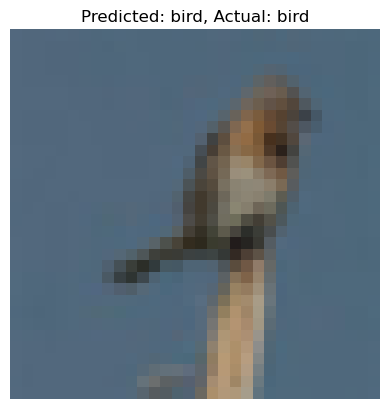

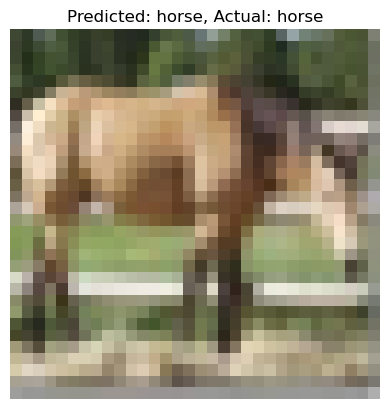

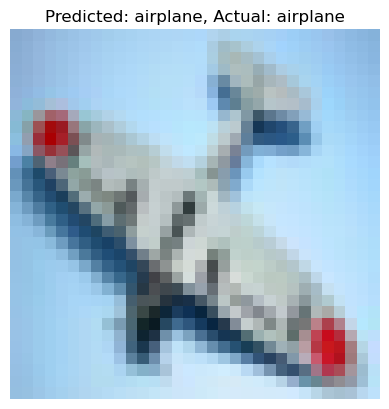

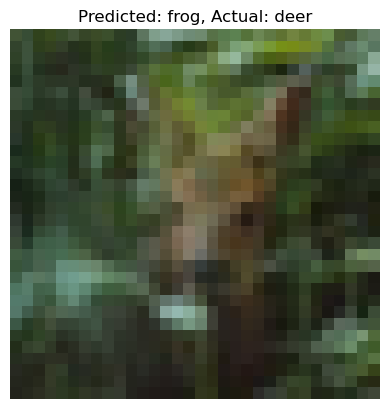

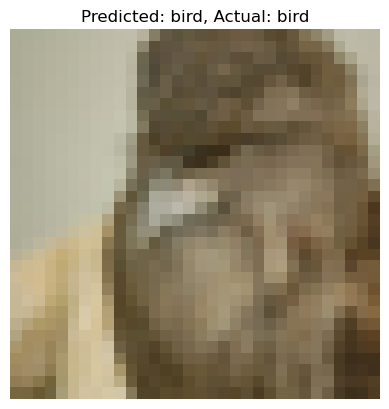

In [25]:
test_model_prediction(cnn_model, x_test, y_test, class_names)